# PREDICTING FLIGHT DELAYS (2015 - 2018)

## Contents
* [Problem Statement](#Problem-Statement)
* [Objectives](#Objectives)
* [Data Acquisition and Exploration](#Data-Acquisition-and-Exploration)
* [Data Preprocessing](#Data-Preprocessing) 
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
* [Classification Modelling](#Classification-Modelling)
* [Model Evaluation](#Model-Evaluation)

### Problem Statement
Flight delays are a persistent issue in the aviation industry, causing substantial inconvenience to passengers and economic losses for airlines. According to the Bureau of Transport Statistics (2018), approximately 19% of flights from major US carriers were delayed between 2012 and 2018.

The aim of this project is to develop a machine learning model that can predict whether a flight will be delayed, using historical flight data (2015 - 2018).

Definition of <b>delayed flight</b>:

- Flight that arrives late at its destination
- If the flight has any delays from its departure, but still arrives to its destination on time, it will not be considered a delayed flight
- Flight that arrive on time is denoted as 0
- Flight that delayed is denoted as 1


###  Objectives

- **Analyze historical flight data** to understand the patterns and causes of delays.
- **Build and evaluate predictive models** (e.g., Logistic Regression, Random Forest, XGBoost).
- **Use feature engineering** to identify the most important variables affecting flight delays.
- **Provide actionable insights** to help airlines reduce delays and improve scheduling.


In [98]:
%matplotlib inline

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

**2015 dataset**

In [99]:
df1 = pd.read_csv("2015.csv")

**2016 dataset**

In [100]:
df2 = pd.read_csv("2016.csv")

**2017 dataset**

In [101]:
df3 = pd.read_csv("2017.csv")

**2018 dataset**

In [102]:
df4 = pd.read_csv("2018.csv")

**Combaine the all dataset (2015-2018)**

In [103]:
flight_data = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [104]:
# Check first 5 instances
flight_data.head(5)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2015-01-01,NK,195,MCO,FLL,2147,2143.0,-4.0,15.0,2158.0,2238.0,7.0,2250,2245.0,-5.0,0.0,NaN,0.0,63.0,62.0,40.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,NK,197,LGA,FLL,1050,1104.0,14.0,20.0,1124.0,1354.0,9.0,1404,1403.0,-1.0,0.0,NaN,0.0,194.0,179.0,150.0,1076.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01,NK,198,FLL,MCO,700,712.0,12.0,19.0,731.0,803.0,10.0,757,813.0,16.0,0.0,NaN,0.0,57.0,61.0,32.0,177.0,0.0,0.0,16.0,0.0,0.0,NaN
3,2015-01-01,NK,199,IAH,LAS,2240,2251.0,11.0,8.0,2259.0,2343.0,4.0,2356,2347.0,-9.0,0.0,NaN,0.0,196.0,176.0,164.0,1222.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01,NK,200,IAH,ORD,623,620.0,-3.0,15.0,635.0,830.0,10.0,855,840.0,-15.0,0.0,NaN,0.0,152.0,140.0,115.0,925.0,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
# Check dimension of dataset
flight_data.shape
print("There are "+ str(flight_data.shape[0]) +" rows and "+ str(flight_data.shape[1]) +" columns from the flight dataset 2015 to 2018.")

There are 24324804 rows and 28 columns from the flight dataset 2015 to 2018.


In [106]:
# Check column type
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24324804 entries, 0 to 24324803
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 

### Features of the dataset

<b>FL_DATE</b> = Date of the Flight<br>
<b>OP_CARRIER</b> = Airline Identifier<br>
<b>OP_CARRIER_FL_NUM</b> = Flight Number<br>
<b>ORIGIN</b> = Starting Airport Code<br>
<b>DEST</b> = Destination Airport Code<br>
<b>CRS_DEP_TIME</b> = Planned Departure Time<br>
<b>DEP_TIME</b> = Actual Departure Time<br>
<b>DEP_DELAY</b> = Total Delay on Departure in minutes<br>
<b>TAXI_OUT</b> = The time duration elapsed between departure from the origin airport gate and wheels off<br>
<b>WHEELS_OFF</b> = The time point that the aircraft's wheels leave the ground<br>
<b>WHEELS_ON</b> = The time point that the aircraft'ss wheels touch on the ground<br>
<b>TAXI_IN</b> = The time duration elapsed between wheels-on and gate arrival at the destination airport<br>
<b>CRS_ARR_TIME</b> = Planned arrival time<br>
<b>ARR_TIME</b> = Actual Arrival Time = ARRIVAL_TIME - SCHEDULED_ARRIVAL<br>
<b>ARR_DELAY</b> = Total Delay on Arrival in minutes<br>
<b>CANCELLED</b> = Flight Cancelled (1 = cancelled)<br>
<b>CANCELLATION_CODE</b> = Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security<br>
<b>DIVERTED</b> = Aircraft landed on different airport that the one scheduled<br>
<b>CRS_ELAPSED_TIME</b> = Planned time amount needed for the flight trip<br>
<b>ACTUAL_ELAPSED_TIME</b> = AIR_TIME+TAXI_IN+TAXI_OUT<br>
<b>AIR_TIME</b> = The time duration between wheels_off and wheels_on time<br>
<b>DISTANCE</b> = Distance between two airports<br>
<b>CARRIER_DELAY</b> = Delay caused by the airline in minutes<br>
<b>WEATHER_DELAY</b> = Delay caused by weather<br>
<b>NAS_DELAY</b> = Delay caused by air system<br>
<b>SECURITY_DELAY</b> = caused by security reasons<br>
<b>LATE_AIRCRAFT_DELAY</b> = Delay caused by security<br>

### Data Preprocessing

* [Handle of missing data](#Handle-of-missing-data)
* [Transformation of Duration time taken](#Transformation-of-Duration-time-taken)
* [Rename of OP_CARRIER](#Rename-of-OP_CARRIER)
* [Transformation of Date](#Transformation-of-Date)
* [Data reduction: Focus on Busy Airports](#Data-reduction:-Focus-on-Busy-Airports)
* [Rename of airports and city](#Rename-of-airports-and-city)
* [Transformation of Target attribute: Flight status](#Transformation-of-Target-attribute:-Flight-status)

#### Handle of missing data

In [107]:
# Calculate the proportion of missing data

def checkMissing(data,perc=0):
    """ 
    Takes in a dataframe and returns
    the percentage of missing value.
    """
    missing = [(i, data[i].isna().mean()*100) for i in data]
    missing = pd.DataFrame(missing, columns=["column_name", "percentage"])
    missing = missing[missing.percentage > perc]
    print(missing.sort_values("percentage", ascending=False).reset_index(drop=True))

print("Proportion of missing data in columns")
checkMissing(flight_data)

Proportion of missing data in columns
            column_name  percentage
0           Unnamed: 27  100.000000
1     CANCELLATION_CODE   98.540494
2   LATE_AIRCRAFT_DELAY   81.870929
3         CARRIER_DELAY   81.870929
4         WEATHER_DELAY   81.870929
5             NAS_DELAY   81.870929
6        SECURITY_DELAY   81.870929
7             ARR_DELAY    1.713621
8   ACTUAL_ELAPSED_TIME    1.702941
9              AIR_TIME    1.702941
10            WHEELS_ON    1.497554
11              TAXI_IN    1.497554
12             ARR_TIME    1.497550
13             TAXI_OUT    1.448891
14           WHEELS_OFF    1.448871
15            DEP_DELAY    1.427292
16             DEP_TIME    1.406934
17     CRS_ELAPSED_TIME    0.000119


These columns are dropped: `Unnamed: 27`, `CANCELLATION_CODE`, `LATE_AIRCRAFT_DELAY`, `CARRIER_DELAY`, `WEATHER_DELAY`, `NAS_DELAY` and `SECURITY_DELAY` from the dataframe as these columns had more than 50% of missing values which does not provide any useful information to our analysis. Since our main objective is to predict flight delay, column `CANCELLED` is irrelevant to our scope of work as a canceled flight is not a delayed flight as it never left nor arrived to its destination for whatever reason. `OP_CARRIER_FL_NUM` is also not relevant to our predictions. 

After further investigation on the dataset,  `LATE_AIRCRAFT_DELAY`, `CARRIER_DELAY`, `WEATHER_DELAY`, `NAS_DELAY` and `SECURITY_DELAY` are showing the split of delayed minutes for the flight. Thus, the missing data is actually implying that there is no delay for the instance. The missing values for these attributes are imputed with zero.

In [108]:
#Fill the missing value 0
flight_data['LATE_AIRCRAFT_DELAY']=flight_data['LATE_AIRCRAFT_DELAY'].fillna(0)
flight_data['CARRIER_DELAY']=flight_data['CARRIER_DELAY'].fillna(0)
flight_data['WEATHER_DELAY']=flight_data['WEATHER_DELAY'].fillna(0)
flight_data['NAS_DELAY']=flight_data['NAS_DELAY'].fillna(0)
flight_data['SECURITY_DELAY']=flight_data['SECURITY_DELAY'].fillna(0)

#### Transformation of Duration time taken
Checking on the calculation for Departure Delay and Arrival Delay in minutes

The derivation of the delayed time of departure and delayed time of arrival is as shown below:
- DEP_DELAY = CRS_DEP_TIME - DEP_TIME
- ARR_DELAY = ARR_TIME - CRS_ARR_TIME

`CRS_DEP_TIME`, `DEP_TIME`, `CRS_ARR_TIME` and `ARR_TIME` can be eliminated as`DEP_DELAY` and `ARR_DELAY` are informative enough to provide the length of time of the delay in minutes.

In [109]:
# Function that convert the 'HHMM' string to datetime.time
def format_heure(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        if chaine == 2400: chaine = 0
        chaine = "{0:04d}".format(int(chaine))
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure

In [110]:
flight_data['DEP_TIME'] = flight_data['DEP_TIME'].apply(format_heure)
flight_data['CRS_DEP_TIME'] = flight_data['CRS_DEP_TIME'].apply(format_heure)

flight_data['ARR_TIME'] = flight_data['ARR_TIME'].apply(format_heure) 
flight_data['CRS_ARR_TIME'] = flight_data['CRS_ARR_TIME'].apply(format_heure)

flight_data['WHEELS_OFF'] = flight_data['WHEELS_OFF'].apply(format_heure)
flight_data['WHEELS_ON'] = flight_data['WHEELS_ON'].apply(format_heure)

In [111]:
flight_data['DEP_TIME']

0           21:43:00
1           11:04:00
2           07:12:00
3           22:51:00
4           06:20:00
              ...   
24324799    15:30:00
24324800    17:57:00
24324801    20:10:00
24324802    13:23:00
24324803    14:43:00
Name: DEP_TIME, Length: 24324804, dtype: object

In [112]:
# Convert flight_data column to datetime format

def time_difference(actual,plan):
    actual_time = pd.to_timedelta(actual.astype(str)) 
    plan_time = pd.to_timedelta(plan.astype(str))
    return actual_time.sub(plan_time).dt.total_seconds().div(60)

flight_data['WHEELS_OFF_elapse'] =  time_difference(flight_data['WHEELS_OFF'],flight_data['DEP_TIME'])
flight_data['WHEELS_ON_elapse'] =  time_difference(flight_data['ARR_TIME'] ,flight_data['WHEELS_ON'])

# Remove incorrect record
flight_data=flight_data[flight_data['WHEELS_OFF_elapse']>0]
flight_data=flight_data[flight_data['WHEELS_ON_elapse']>0]

In [113]:
# Check first 2 instances
flight_data.head(2)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,WHEELS_OFF_elapse,WHEELS_ON_elapse
0,2015-01-01,NK,195,MCO,FLL,21:47:00,21:43:00,-4.0,15.0,21:58:00,22:38:00,7.0,22:50:00,22:45:00,-5.0,0.0,NaN,0.0,63.0,62.0,40.0,177.0,0.0,0.0,0.0,0.0,0.0,NaN,15.0,7.0
1,2015-01-01,NK,197,LGA,FLL,10:50:00,11:04:00,14.0,20.0,11:24:00,13:54:00,9.0,14:04:00,14:03:00,-1.0,0.0,NaN,0.0,194.0,179.0,150.0,1076.0,0.0,0.0,0.0,0.0,0.0,NaN,20.0,9.0


In [114]:
# Drop the unused columns 

flight_data.drop(['Unnamed: 27', 
                  'CANCELLATION_CODE',
                  'CANCELLED',
                  'OP_CARRIER_FL_NUM',
                  'CRS_DEP_TIME',
                  'DEP_TIME',
                  'CRS_ARR_TIME',
                  'ARR_TIME',
                  'WHEELS_ON',
                  'WHEELS_OFF'
                 ],
                 axis = 1, inplace = True)

In [115]:
flight_data.head(2)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse
0,2015-01-01,NK,MCO,FLL,-4.0,15.0,7.0,-5.0,0.0,63.0,62.0,40.0,177.0,0.0,0.0,0.0,0.0,0.0,15.0,7.0
1,2015-01-01,NK,LGA,FLL,14.0,20.0,9.0,-1.0,0.0,194.0,179.0,150.0,1076.0,0.0,0.0,0.0,0.0,0.0,20.0,9.0


**Drop the missing values**

In [116]:
#Check number of missing values
flight_data.isna().sum()

FL_DATE                    0
OP_CARRIER                 0
ORIGIN                     0
DEST                       0
DEP_DELAY               4735
TAXI_OUT                   0
TAXI_IN                    0
ARR_DELAY              51837
DIVERTED                   0
CRS_ELAPSED_TIME           7
ACTUAL_ELAPSED_TIME    49239
AIR_TIME               49239
DISTANCE                   0
CARRIER_DELAY              0
WEATHER_DELAY              0
NAS_DELAY                  0
SECURITY_DELAY             0
LATE_AIRCRAFT_DELAY        0
WHEELS_OFF_elapse          0
WHEELS_ON_elapse           0
dtype: int64

In [117]:
flight_data = flight_data.dropna()

In [118]:
#Check number of missing values
flight_data.isna().sum()

FL_DATE                0
OP_CARRIER             0
ORIGIN                 0
DEST                   0
DEP_DELAY              0
TAXI_OUT               0
TAXI_IN                0
ARR_DELAY              0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
WHEELS_OFF_elapse      0
WHEELS_ON_elapse       0
dtype: int64

#### Rename of OP_CARRIER

`OP_CARRIER` refers to the airline identifier recorded with its abbreviation form. To make the content more intuitive, the column of abbreviation names are transformed with airlines extended names. The main reference source for the extended name is obtained from <a href="https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States">Wikipedia</a>


In [119]:
# Check the instances for OP_CARRIER
flight_data.OP_CARRIER.unique()

array(['NK', 'MQ', 'OO', 'EV', 'HA', 'UA', 'US', 'VX', 'WN', 'B6', 'F9',
       'AA', 'AS', 'DL', '9E', 'G4', 'OH', 'YV', 'YX'], dtype=object)

In [120]:
flight_data['OP_CARRIER'].replace({
    'NK':'Spirit Airlines',
    'MQ':'Envoy Air',
    'OO':'SkyWest Airlines',
    'EV':'ExpressJet',
    'HA':'Hawaiian Airlines',
    'UA':'United Airlines',
    'US':'American Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'B6':'JetBlue Airways',
    'F9':'Frontier Airlines',
    'AA':'American Airlines',
    'AS':'Alaska Airlines',
    'DL':'Delta Airlines',
    '9E':'Endeavor Air',
    'G4':'Allegiant Air',
    'OH':'PSA Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways'
}, inplace=True)

In [121]:
flight_data.OP_CARRIER.nunique()

18

In [122]:
flight_data.OP_CARRIER.value_counts()

OP_CARRIER
Southwest Airlines    5143713
Delta Airlines        3624331
American Airlines     3560956
SkyWest Airlines      2619338
United Airlines       2218975
ExpressJet            1554494
JetBlue Airways       1111454
Alaska Airlines        765434
Spirit Airlines        568245
Envoy Air              561862
Frontier Airlines      397032
Hawaiian Airlines      315309
Republic Airways       303927
PSA Airlines           264929
Endeavor Air           231211
Virgin America         214744
Mesa Airline           208382
Allegiant Air           94982
Name: count, dtype: int64

#### Data reduction: Focus on Busy Airports
Even though a lot of pre-processing and cleaning has been done on a separate notebook, this one will be only aiming to obtain a final dataframe for the modeling which will have the top 20 cities only. The reason to do it this way is because the DEST feature is a categorical column of 358 values. The hot encoding will then be done for this 20 instead of the 358 total destinations.  

In [123]:
flight_data.ORIGIN.value_counts().iloc[:20]

ORIGIN
ATL    1491613
ORD    1123627
DFW     891933
DEN     878275
LAX     835558
SFO     662863
PHX     636134
LAS     596466
IAH     586249
CLT     550465
MSP     537719
SEA     520874
DTW     518371
MCO     505580
BOS     498384
EWR     469048
LGA     448679
SLC     432581
JFK     407003
BWI     387952
Name: count, dtype: int64

In [124]:
top_ARR_cities = flight_data.ORIGIN.value_counts().iloc[0:20].rename_axis('ORIGIN').reset_index(name='TOTAL_FLIGHTS')
top_ARR_cities.head()

,ORIGIN,TOTAL_FLIGHTS
0,ATL,1491613
1,ORD,1123627
2,DFW,891933
3,DEN,878275
4,LAX,835558


In [125]:
flight_data.DEST.value_counts().iloc[:20]

DEST
ATL    1496167
ORD    1120650
DFW     892160
DEN     884529
LAX     844262
SFO     668910
PHX     638836
LAS     600562
IAH     584475
CLT     553307
MSP     538263
SEA     523385
DTW     517140
MCO     503676
BOS     495356
EWR     466769
LGA     447384
SLC     435912
JFK     404359
BWI     387178
Name: count, dtype: int64

In [126]:
top_cities = flight_data.DEST.value_counts().iloc[0:20].rename_axis('DEST').reset_index(name='TOTAL_FLIGHTS')
top_cities.head()

,DEST,TOTAL_FLIGHTS
0,ATL,1496167
1,ORD,1120650
2,DFW,892160
3,DEN,884529
4,LAX,844262


In [127]:
# Checking the cities within the numpy array just to verify that it worked
top_ARR_cities.ORIGIN.unique()

# Creating a list with top cities only:
city_ARR_list = top_ARR_cities['ORIGIN'].tolist()

In [128]:
# Checking the cities within the numpy array just to verify that it worked
top_cities.DEST.unique()

# Creating a list with top cities only:
city_list = top_cities['DEST'].tolist()

In [129]:
city_list

['ATL',
 'ORD',
 'DFW',
 'DEN',
 'LAX',
 'SFO',
 'PHX',
 'LAS',
 'IAH',
 'CLT',
 'MSP',
 'SEA',
 'DTW',
 'MCO',
 'BOS',
 'EWR',
 'LGA',
 'SLC',
 'JFK',
 'BWI']

In [130]:
city_ARR_list

['ATL',
 'ORD',
 'DFW',
 'DEN',
 'LAX',
 'SFO',
 'PHX',
 'LAS',
 'IAH',
 'CLT',
 'MSP',
 'SEA',
 'DTW',
 'MCO',
 'BOS',
 'EWR',
 'LGA',
 'SLC',
 'JFK',
 'BWI']

In [131]:
boolean_series =  flight_data.DEST.isin(city_list)
flight_data =  flight_data[boolean_series]
boolean_ARR_series =  flight_data.ORIGIN.isin(city_ARR_list)
flight_data =  flight_data[boolean_ARR_series]
flight_data.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse
3,2015-01-01,Spirit Airlines,IAH,LAS,11.0,8.0,4.0,-9.0,0.0,196.0,176.0,164.0,1222.0,0.0,0.0,0.0,0.0,0.0,8.0,4.0
4,2015-01-01,Spirit Airlines,IAH,ORD,-3.0,15.0,10.0,-15.0,0.0,152.0,140.0,115.0,925.0,0.0,0.0,0.0,0.0,0.0,15.0,10.0
6,2015-01-01,Spirit Airlines,DFW,BWI,-5.0,11.0,5.0,-19.0,0.0,162.0,148.0,132.0,1217.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0
11,2015-01-01,Spirit Airlines,LAS,DFW,-1.0,13.0,6.0,-1.0,0.0,147.0,147.0,128.0,1055.0,0.0,0.0,0.0,0.0,0.0,13.0,6.0
13,2015-01-01,Spirit Airlines,LAX,IAH,-7.0,27.0,10.0,14.0,0.0,187.0,208.0,171.0,1379.0,0.0,0.0,0.0,0.0,0.0,27.0,10.0


#### Transformation for Date

In [132]:
import calendar
flight_date=pd.DatetimeIndex(flight_data['FL_DATE'])

flight_data['DAY'] = flight_date.day
flight_data['MONTH'] = flight_date.month
flight_data['MONTH_AB'] = flight_data['MONTH'].apply(lambda x: calendar.month_abbr[x])
flight_data['DAYOFWEEK'] = flight_date.dayofweek
flight_data['DAYNAME'] = flight_data['DAYOFWEEK'].apply(lambda x: calendar.day_name[x])

# 1 Weekday, 0 Weekend
daytype = []
for value in flight_data['DAYOFWEEK']:
    if value in (0,1,2,3,4):
        daytype.append(1) #weekday
    else:
        daytype.append(0) #weekend
flight_data['WEEKDAY'] = daytype
flight_data.head(2)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse,DAY,MONTH,MONTH_AB,DAYOFWEEK,DAYNAME,WEEKDAY
3,2015-01-01,Spirit Airlines,IAH,LAS,11.0,8.0,4.0,-9.0,0.0,196.0,176.0,164.0,1222.0,0.0,0.0,0.0,0.0,0.0,8.0,4.0,1,1,Jan,3,Thursday,1
4,2015-01-01,Spirit Airlines,IAH,ORD,-3.0,15.0,10.0,-15.0,0.0,152.0,140.0,115.0,925.0,0.0,0.0,0.0,0.0,0.0,15.0,10.0,1,1,Jan,3,Thursday,1


In [133]:
# For checking
print('Maximum number of days in a month:', flight_data.DAY.nunique())
print('Total number of months:', flight_data.MONTH.nunique())
print('Total number of days per week:', flight_data.DAYNAME.nunique())

print()

print('Months present in dataframe:',flight_data.MONTH.unique())
print('Months present in dataframe:', flight_data.MONTH_AB.unique())

print()
print('Days present in dataframe:', flight_data['DAYOFWEEK'].unique())
print('Days present in dataframe:', flight_data.DAYNAME.unique())

Maximum number of days in a month: 31
Total number of months: 12
Total number of days per week: 7

Months present in dataframe: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Months present in dataframe: ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']

Days present in dataframe: [3 4 5 6 0 1 2]
Days present in dataframe: ['Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']


#### Rename of Airports and city name

These two column have the IATA airports codes for the origin and destination. I will try to change it to a real city name so that I can do flight analysis per city as well as part of the EDA.

For this purpose I found a file called airports from 2015, therefore it might be incomplete so I will have to play with it and see what I can do to complete it.

Lets start by loading the file and by exploring it:

In [134]:
airports = pd.read_csv('airports.csv')
airports.head(10)

,IATA_CODE,AIRPORT,CITY
0,AZA,Phoenix-Mesa Gateway Airport,NaN
1,BKG,Branson Airport,NaN
2,ABE,Lehigh Valley International Airport,Allentown
3,ABI,Abilene Regional Airport,Abilene
4,ABQ,Albuquerque International Sunport,Albuquerque
5,ABR,Aberdeen Regional Airport,Aberdeen
6,ABY,Southwest Georgia Regional Airport,Albany
7,ACK,Nantucket Memorial Airport,Nantucket
8,ACT,Waco Regional Airport,Waco
9,ACV,Arcata Airport,Arcata/Eureka


In [135]:
# Check dimension of dataset
airports.shape
print("There are "+ str(airports.shape[0]) +" rows and "+ str(airports.shape[1]) +" columns from the airport dataset.")

There are 353 rows and 3 columns from the airport dataset.


In [136]:
# Covert to list
airport_IATA_CODE = list(airports['IATA_CODE'])

In [137]:
flight_data.ORIGIN.unique()

array(['IAH', 'DFW', 'LAS', 'LAX', 'ORD', 'DTW', 'MSP', 'ATL', 'LGA',
       'DEN', 'BWI', 'MCO', 'PHX', 'SLC', 'SFO', 'CLT', 'SEA', 'EWR',
       'JFK', 'BOS'], dtype=object)

In [138]:
# Get the list of origin and destination from `flight_data` 
flight_ORIGIN = flight_data.ORIGIN.unique().tolist()
flight_DEST = flight_data.DEST.unique().tolist()

# Check type
print("Type:")
print(type(flight_ORIGIN))
print(type(flight_DEST))
print()
print("Length:")
print("Origin: "+str(len(flight_ORIGIN)))
print("Destination: "+str(len(flight_DEST)))

Type:
<class 'list'>
<class 'list'>

Length:
Origin: 20
Destination: 20


In [139]:
difference = [item for item in flight_ORIGIN if item not in airport_IATA_CODE]
print("IATA Code (Origin) that is not found from the airport data:")
print(difference)
print()
print("There are "+str(len(difference)))

IATA Code (Origin) that is not found from the airport data:
[]

There are 0


In [140]:
difference_2 = [item for item in flight_DEST if item not in airport_IATA_CODE]
print("IATA Code (Destination) that is not found from airport data:")
print(difference_2)
print()

IATA Code (Destination) that is not found from airport data:
[]



In [141]:
# Creating a dictionary and looking at its type for QC purposes
airport_dict = pd.Series(airports.AIRPORT.values, index=airports.IATA_CODE).to_dict()

In [142]:
flight_data['ORIGIN'].replace(airport_dict, inplace=True)
flight_data['DEST'].replace(airport_dict, inplace=True)
flight_data.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse,DAY,MONTH,MONTH_AB,DAYOFWEEK,DAYNAME,WEEKDAY
3,2015-01-01,Spirit Airlines,George Bush Intercontinental Airport,McCarran International Airport,11.0,8.0,4.0,-9.0,0.0,196.0,176.0,164.0,1222.0,0.0,0.0,0.0,0.0,0.0,8.0,4.0,1,1,Jan,3,Thursday,1
4,2015-01-01,Spirit Airlines,George Bush Intercontinental Airport,Chicago O'Hare International Airport,-3.0,15.0,10.0,-15.0,0.0,152.0,140.0,115.0,925.0,0.0,0.0,0.0,0.0,0.0,15.0,10.0,1,1,Jan,3,Thursday,1
6,2015-01-01,Spirit Airlines,Dallas/Fort Worth International Airport,Baltimore-Washington International Airport,-5.0,11.0,5.0,-19.0,0.0,162.0,148.0,132.0,1217.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,1,1,Jan,3,Thursday,1
11,2015-01-01,Spirit Airlines,McCarran International Airport,Dallas/Fort Worth International Airport,-1.0,13.0,6.0,-1.0,0.0,147.0,147.0,128.0,1055.0,0.0,0.0,0.0,0.0,0.0,13.0,6.0,1,1,Jan,3,Thursday,1
13,2015-01-01,Spirit Airlines,Los Angeles International Airport,George Bush Intercontinental Airport,-7.0,27.0,10.0,14.0,0.0,187.0,208.0,171.0,1379.0,0.0,0.0,0.0,0.0,0.0,27.0,10.0,1,1,Jan,3,Thursday,1


#### Transformation of Target attribute: Flight status
`FLIGHT_STATUS` is the outcome of the flight whether it arrives destination on time or it is delayed, thus the responses is binary where 0 is for flights that arrive earlier or on time and 1 is for flights that are delayed. 

In [143]:
status = []

for value in flight_data['ARR_DELAY']:
    if value <= 15:
        status.append(0)
    else:
        status.append(1)
flight_data['FLIGHT_STATUS'] = status    

In [144]:
flight_data.head(2)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse,DAY,MONTH,MONTH_AB,DAYOFWEEK,DAYNAME,WEEKDAY,FLIGHT_STATUS
3,2015-01-01,Spirit Airlines,George Bush Intercontinental Airport,McCarran International Airport,11.0,8.0,4.0,-9.0,0.0,196.0,176.0,164.0,1222.0,0.0,0.0,0.0,0.0,0.0,8.0,4.0,1,1,Jan,3,Thursday,1,0
4,2015-01-01,Spirit Airlines,George Bush Intercontinental Airport,Chicago O'Hare International Airport,-3.0,15.0,10.0,-15.0,0.0,152.0,140.0,115.0,925.0,0.0,0.0,0.0,0.0,0.0,15.0,10.0,1,1,Jan,3,Thursday,1,0


### Exploratory Data Analysis 

In [145]:
flight_category = flight_data.select_dtypes(include=['object','category'])
flight_numerical = flight_data.select_dtypes(exclude=['object'])

In [146]:
flight_category.head(2)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,MONTH_AB,DAYNAME
3,2015-01-01,Spirit Airlines,George Bush Intercontinental Airport,McCarran International Airport,Jan,Thursday
4,2015-01-01,Spirit Airlines,George Bush Intercontinental Airport,Chicago O'Hare International Airport,Jan,Thursday


In [147]:
flight_numerical.head(2)

,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse,DAY,MONTH,DAYOFWEEK,WEEKDAY,FLIGHT_STATUS
3,11.0,8.0,4.0,-9.0,0.0,196.0,176.0,164.0,1222.0,0.0,0.0,0.0,0.0,0.0,8.0,4.0,1,1,3,1,0
4,-3.0,15.0,10.0,-15.0,0.0,152.0,140.0,115.0,925.0,0.0,0.0,0.0,0.0,0.0,15.0,10.0,1,1,3,1,0


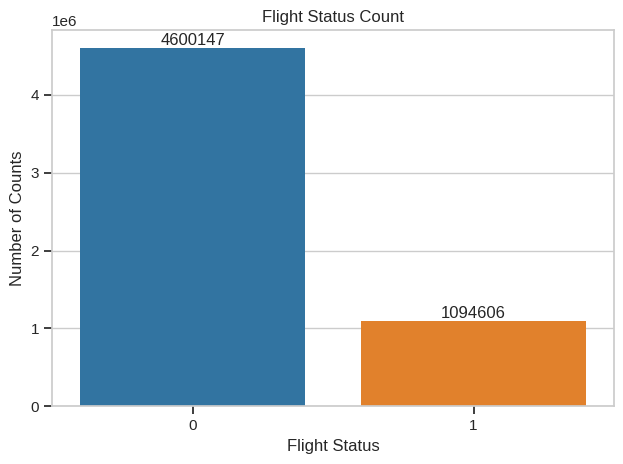

In [148]:
# Output Barplot showing the occurence of flight outcome

sns.set_context("notebook")
g = sns.countplot(x="FLIGHT_STATUS", data=flight_data)
g.set(xlabel="Flight Status", ylabel="Number of Counts")

# Annotate the bars with integer counts
for p in g.patches:
    g.annotate(format(int(p.get_height()), 'd'),  # convert to int
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='bottom')

plt.title("Flight Status Count")
plt.tight_layout()
plt.show()

[Text(0.5, 0, 'Number of counts')]

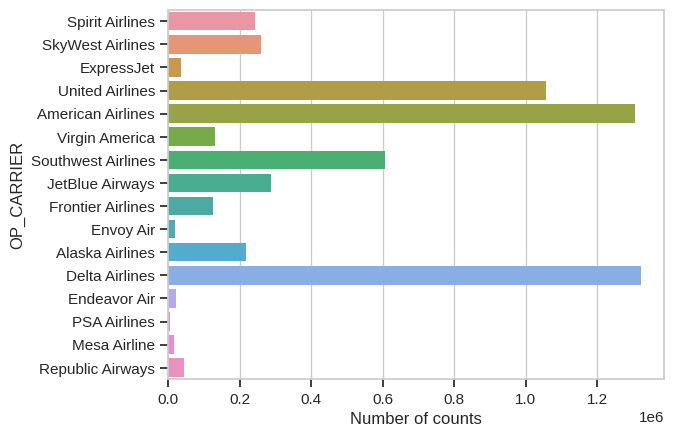

In [149]:
# Output Barplot showing the occurence of each categorical features         

sns.set_context("notebook")
g=sns.countplot(y="OP_CARRIER",data=flight_category)
g.set(xlabel="Number of counts")

[Text(0.5, 0, 'Number of counts')]

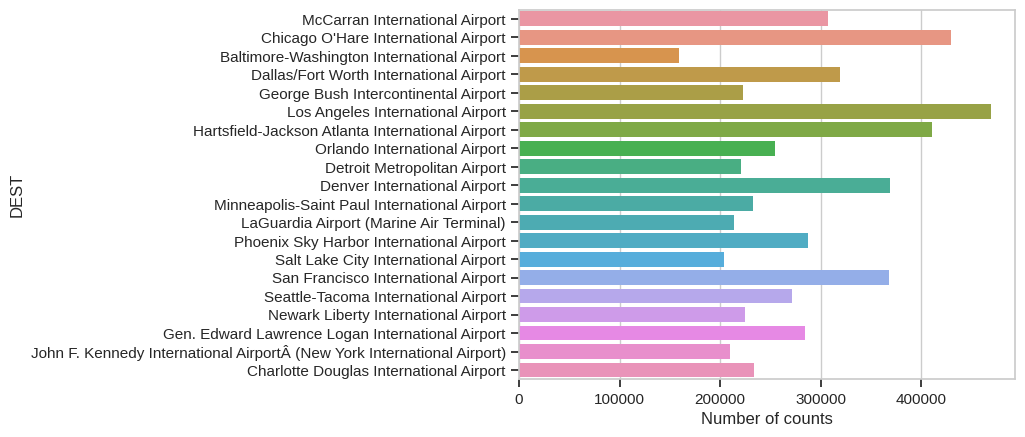

In [150]:
# Output Barplot showing the occurence of each categorical features         

sns.set_context("notebook")
g=sns.countplot(y="DEST",data=flight_category)
g.set(xlabel="Number of counts")

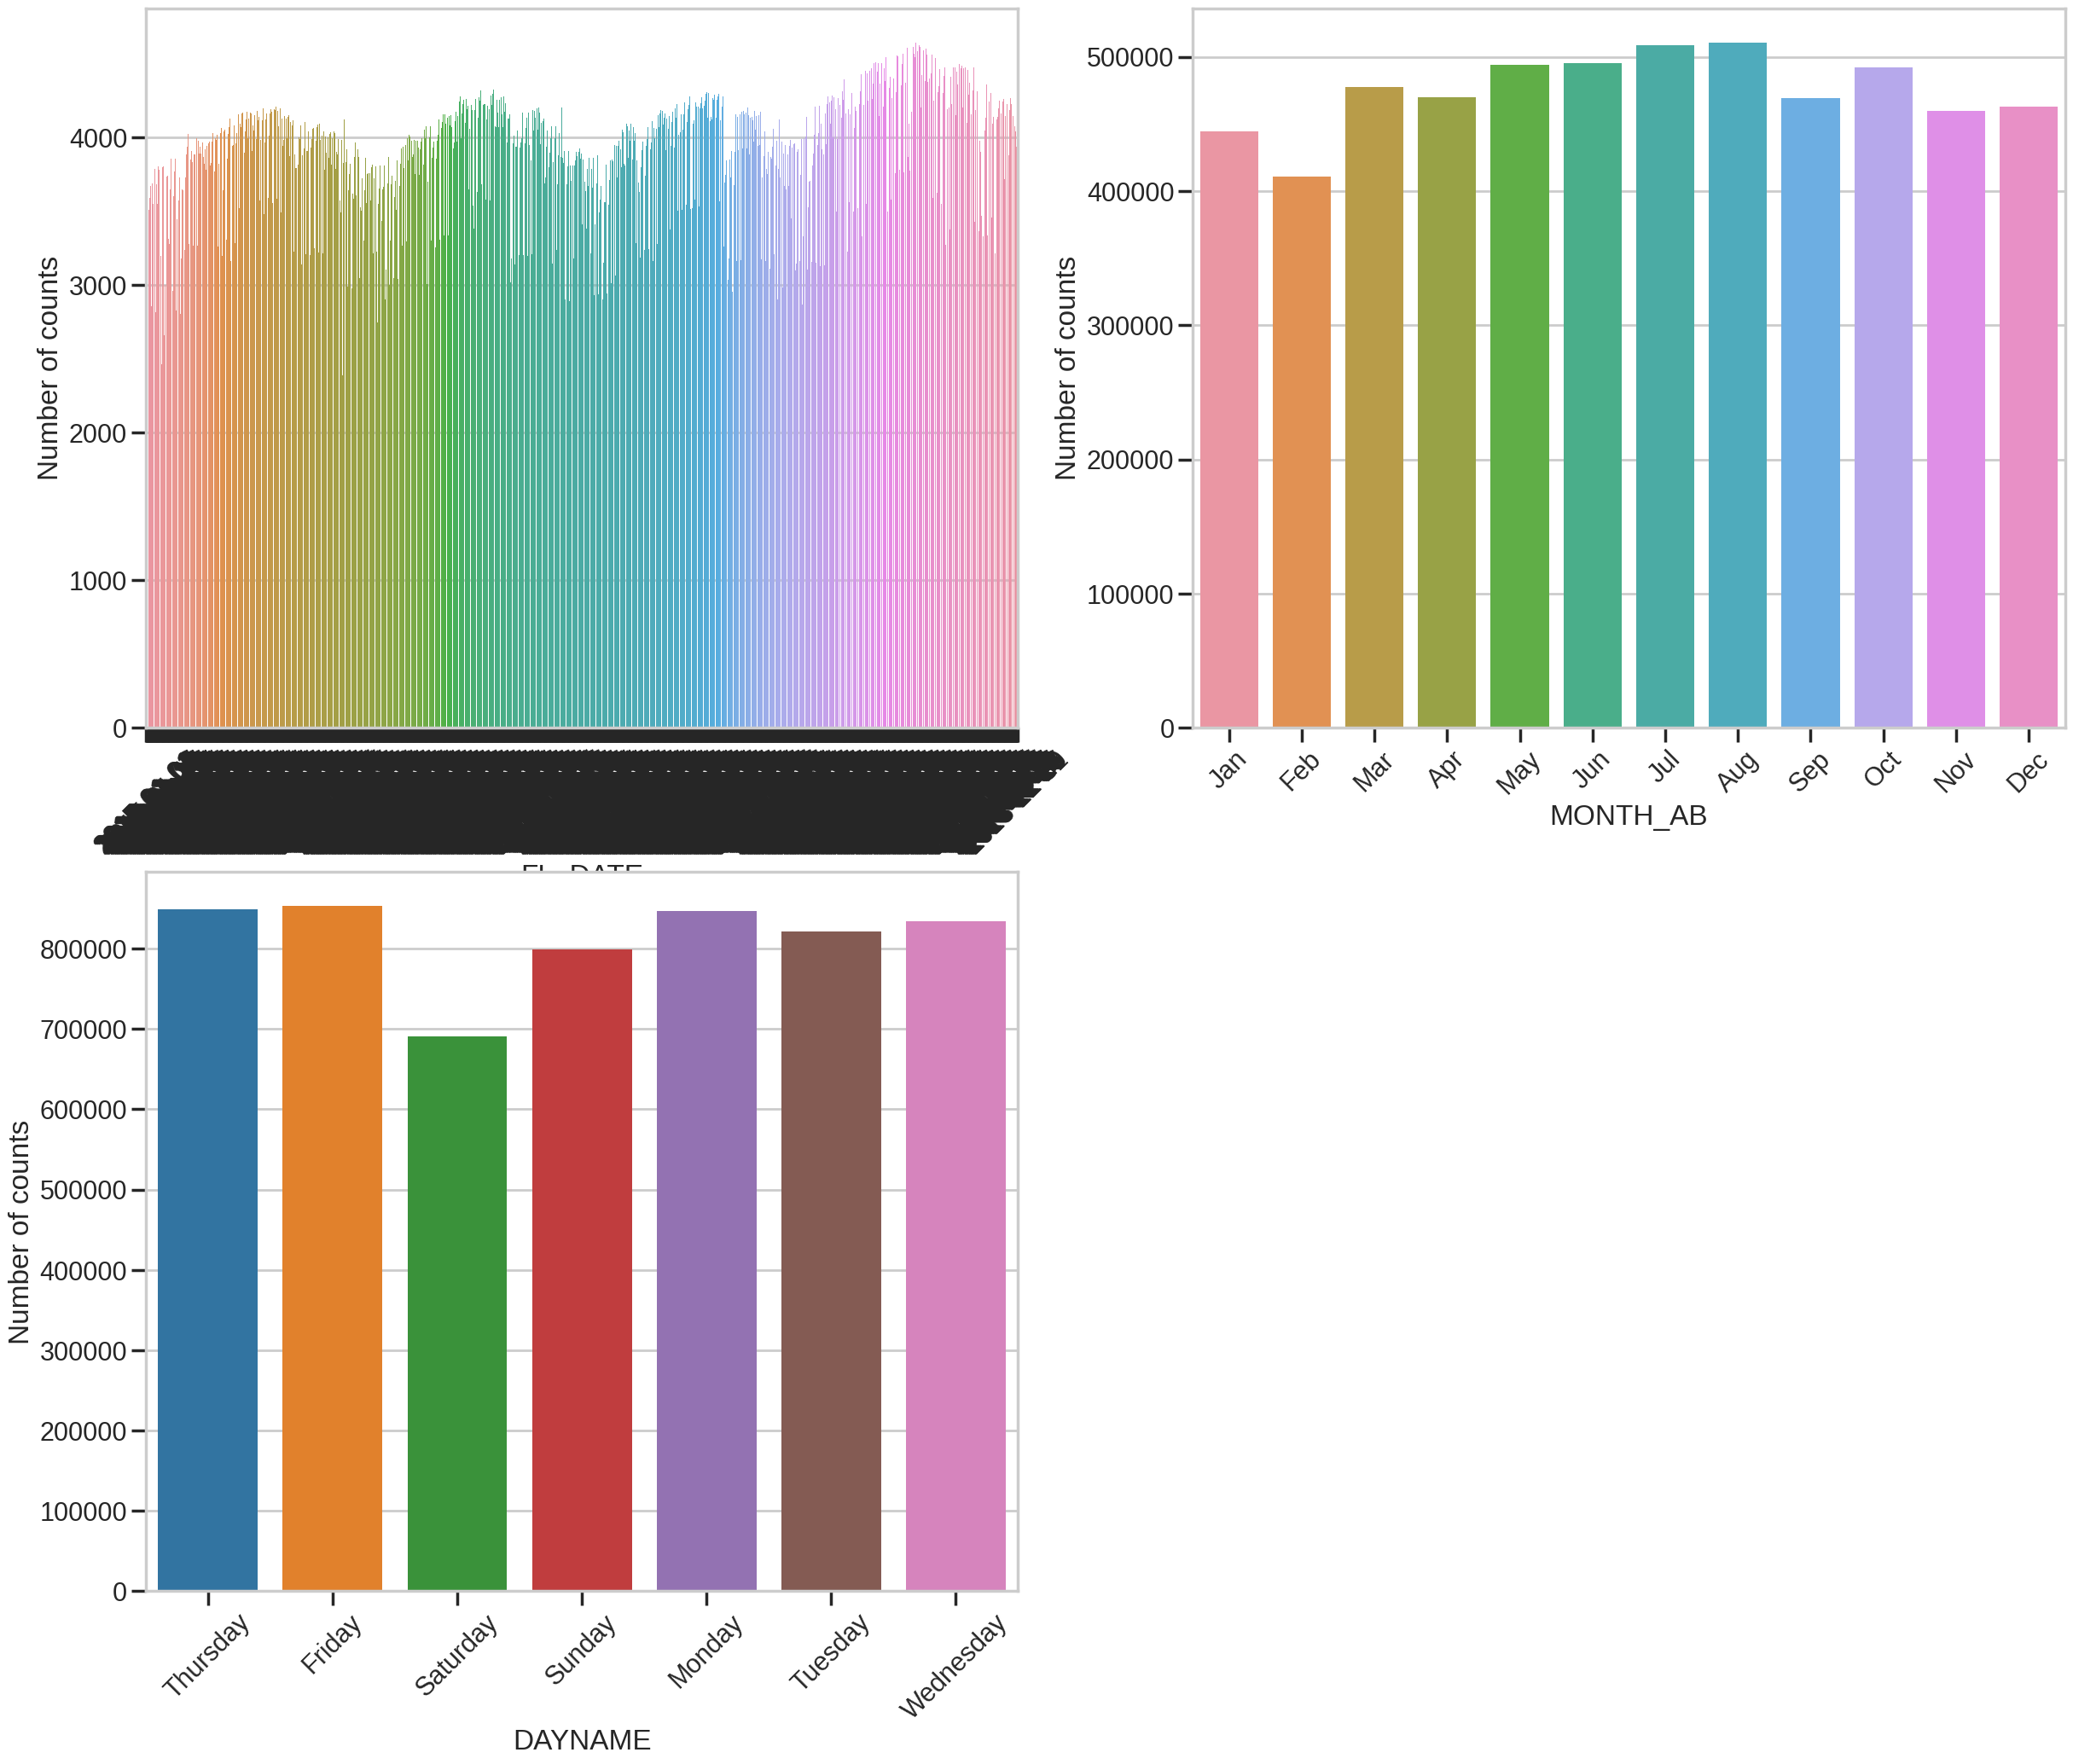

In [151]:
# Finding categorical features

category = []
for i in flight_category:
    if i in ["ORIGIN","DEST","OP_CARRIER","FLIGHT_STATUS"]:
        pass
    else:
        category.append(i)
        
# Output Barplot showing the occurence of each categorical features         
fig, ax = plt.subplots(ncols=2, figsize=(12,12))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2.5)
sns.color_palette("husl", 8)
sns.set_context("poster")

#ncols=2,nrows=round(len(list(category))/2)

for i, feature in enumerate(list(flight_category[category]), 1):
    plt.subplot(len(list(category)), 2, i)
    g=sns.countplot(x=feature,data=flight_category)
    g.set(ylabel="Number of counts")
    plt.xticks(rotation=45)
   
plt.show()

#### Data Preparation
- Encoding
- Feature Selection


#### One hot encoding for categorical attributes

We converted some categorical variables into numeric variables via one hot encoding method in which one dummy variable would be created for every object in the categorical variable. If the particular object is present, the value would be denoted as 1, otherwise the value would be 0.

In [152]:
Carrier = pd.get_dummies(flight_data['OP_CARRIER'],prefix="OP_CARRIER",drop_first=False)
#Destination = pd.get_dummies(flight_data['DEST'],drop_first=False)
#Destination.columns = ['Charlotte_Airport','Chicago_Airport','Dallas_Airpot','Denver_Airport','Dentroit_Airport','GELL_Airpot','George_Aiport','Hartsfield_Airport','JohnFKeenedy_Airpot','LaGuardia_Airport','LosAngelas_Airport','McCarran_Airport','MSP_Airport','NL_Airport','Orlando_Airport','Philadelphia_Airport','Phoenix_Airport','Ronald_Airport','SanFrancisco_Airport','Seattle_Aiport']                  
month= pd.get_dummies(flight_data['MONTH_AB'],prefix="MONTH",drop_first=False)
day= pd.get_dummies(flight_data['DAYNAME'],prefix="DAY",drop_first=False)

#flight_data_new=pd.concat([flight_data,Carrier,Destination,month,day],axis=1)
flight_data_new=pd.concat([flight_data,Carrier,month,day],axis=1)

In [153]:
flight_data_new.head(2)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse,DAY,MONTH,MONTH_AB,DAYOFWEEK,DAYNAME,WEEKDAY,FLIGHT_STATUS,OP_CARRIER_Alaska Airlines,OP_CARRIER_American Airlines,OP_CARRIER_Delta Airlines,OP_CARRIER_Endeavor Air,OP_CARRIER_Envoy Air,OP_CARRIER_ExpressJet,OP_CARRIER_Frontier Airlines,OP_CARRIER_JetBlue Airways,OP_CARRIER_Mesa Airline,OP_CARRIER_PSA Airlines,OP_CARRIER_Republic Airways,OP_CARRIER_SkyWest Airlines,OP_CARRIER_Southwest Airlines,OP_CARRIER_Spirit Airlines,OP_CARRIER_United Airlines,OP_CARRIER_Virgin America,MONTH_Apr,MONTH_Aug,MONTH_Dec,MONTH_Feb,MONTH_Jan,MONTH_Jul,MONTH_Jun,MONTH_Mar,MONTH_May,MONTH_Nov,MONTH_Oct,MONTH_Sep,DAY_Friday,DAY_Monday,DAY_Saturday,DAY_Sunday,DAY_Thursday,DAY_Tuesday,DAY_Wednesday
3,2015-01-01,Spirit Airlines,George Bush Intercontinental Airport,McCarran International Airport,11.0,8.0,4.0,-9.0,0.0,196.0,176.0,164.0,1222.0,0.0,0.0,0.0,0.0,0.0,8.0,4.0,1,1,Jan,3,Thursday,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,2015-01-01,Spirit Airlines,George Bush Intercontinental Airport,Chicago O'Hare International Airport,-3.0,15.0,10.0,-15.0,0.0,152.0,140.0,115.0,925.0,0.0,0.0,0.0,0.0,0.0,15.0,10.0,1,1,Jan,3,Thursday,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False


#### Feature selection
* [Drop redundant columns](#Drop-redundant-columns)
* [Drop constant columns](#Drop-constant-columns)
* [Remove multicollinearity effect](#Remove-multicollinearity-effect)
* [Importance by Random Forest](#Importance-by-Random-Forest)

#### Drop redundant columns

In [154]:
# Drop the redundant columns 

flight_data_new.drop(['FL_DATE', 
                      'OP_CARRIER',
                      'ORIGIN',
                      'DEST',
                      'DAYOFWEEK',
                      'MONTH',
                      'MONTH_AB',
                      'DAY',
                      'DAYNAME',
                      'WEEKDAY',
                      'ARR_DELAY',
                      'CARRIER_DELAY',
                      'WEATHER_DELAY',
                      'NAS_DELAY',
                      'SECURITY_DELAY',
                      'LATE_AIRCRAFT_DELAY'
                 ],
                 axis = 1, inplace = True)

In [155]:
flight_data_new.head(2)

,DEP_DELAY,TAXI_OUT,TAXI_IN,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_OFF_elapse,WHEELS_ON_elapse,FLIGHT_STATUS,OP_CARRIER_Alaska Airlines,OP_CARRIER_American Airlines,OP_CARRIER_Delta Airlines,OP_CARRIER_Endeavor Air,OP_CARRIER_Envoy Air,OP_CARRIER_ExpressJet,OP_CARRIER_Frontier Airlines,OP_CARRIER_JetBlue Airways,OP_CARRIER_Mesa Airline,OP_CARRIER_PSA Airlines,OP_CARRIER_Republic Airways,OP_CARRIER_SkyWest Airlines,OP_CARRIER_Southwest Airlines,OP_CARRIER_Spirit Airlines,OP_CARRIER_United Airlines,OP_CARRIER_Virgin America,MONTH_Apr,MONTH_Aug,MONTH_Dec,MONTH_Feb,MONTH_Jan,MONTH_Jul,MONTH_Jun,MONTH_Mar,MONTH_May,MONTH_Nov,MONTH_Oct,MONTH_Sep,DAY_Friday,DAY_Monday,DAY_Saturday,DAY_Sunday,DAY_Thursday,DAY_Tuesday,DAY_Wednesday
3,11.0,8.0,4.0,0.0,196.0,176.0,164.0,1222.0,8.0,4.0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,-3.0,15.0,10.0,0.0,152.0,140.0,115.0,925.0,15.0,10.0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False


#### Drop constant variable

In [156]:
from sklearn.model_selection import train_test_split
from feature_engine.selection import DropConstantFeatures

In [157]:
# separate train and test (again, as we transformed the previous ones)

X_train, X_test, y_train, y_test = train_test_split(
    flight_data_new.drop(labels=['FLIGHT_STATUS'], axis=1),
    flight_data_new['FLIGHT_STATUS'],
    test_size=0.2,
    random_state=100)

X_train.shape, X_test.shape

((4555802, 45), (1138951, 45))

In [158]:
sel = DropConstantFeatures(tol=1, variables=None, missing_values='raise')
sel.fit(X_train)

DropConstantFeatures()

In [159]:
# number of quasi-constant features

len(sel.features_to_drop_)

1

In [160]:
sel.features_to_drop_

['DIVERTED']

`DIVERTED` is a constant features with only one kind of response for all instances. This does not give any information to the model, hence we will drop it.

In [161]:
#remove the constant features

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((4555802, 44), (1138951, 44))

#### Remove multicollinearity effect (Positive)

In [162]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']

In [163]:
corrmat

,feature1,feature2,corr
0,CRS_ELAPSED_TIME,AIR_TIME,0.989893
1,AIR_TIME,CRS_ELAPSED_TIME,0.989893
2,ACTUAL_ELAPSED_TIME,AIR_TIME,0.989045
3,AIR_TIME,ACTUAL_ELAPSED_TIME,0.989045
4,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,0.983050
5,ACTUAL_ELAPSED_TIME,CRS_ELAPSED_TIME,0.983050
6,DISTANCE,AIR_TIME,0.980901
7,AIR_TIME,DISTANCE,0.980901
8,DISTANCE,CRS_ELAPSED_TIME,0.980625
9,CRS_ELAPSED_TIME,DISTANCE,0.980625


In [164]:
corrmat.feature1.unique()

array(['CRS_ELAPSED_TIME', 'AIR_TIME', 'ACTUAL_ELAPSED_TIME', 'DISTANCE'],
      dtype=object)

In [165]:
grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 1 correlated groups
out of 44 total features


In [166]:
# now we can print out each group. We see that some groups contain
# only 2 correlated features, some other groups present several features 
# that are correlated among themselves.

for group in correlated_groups:
    print(group)
    print()

           feature1             feature2      corr
0  CRS_ELAPSED_TIME             AIR_TIME  0.989893
4  CRS_ELAPSED_TIME  ACTUAL_ELAPSED_TIME  0.983050
9  CRS_ELAPSED_TIME             DISTANCE  0.980625



In [167]:
# we can now investigate further features within one group.
# let's for example select group 1

group = correlated_groups[0]
group

,feature1,feature2,corr
0,CRS_ELAPSED_TIME,AIR_TIME,0.989893
4,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,0.983050
9,CRS_ELAPSED_TIME,DISTANCE,0.980625


In this group, several features are highly correlated. Which one should we keep and which ones should we remove? Alternatively, we could build a machine learning algorithm using all the features from the above list, and select the more predictive one.

In [168]:
from sklearn.ensemble import RandomForestClassifier

# add all features of the group to a list
features = list(group['feature2'].unique())+['CRS_ELAPSED_TIME']

# train a random forest 
rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=4)
rf.fit(X_train[features].fillna(0), y_train)

RandomForestClassifier(max_depth=4, random_state=100)

In [169]:
# get the feature importance attributed by the 
# random forest model (more on this in coming lectures)

importance = pd.concat(
    [pd.Series(features),
     pd.Series(rf.feature_importances_)], axis=1)

importance.columns = ['feature', 'importance']

# sort features by importance, most important first
importance.sort_values(by='importance', ascending=False)

,feature,importance
1,ACTUAL_ELAPSED_TIME,0.537181
3,CRS_ELAPSED_TIME,0.240444
0,AIR_TIME,0.112439
2,DISTANCE,0.109937


`ACTUAL_ELAPSED_TIME`,`CRS_ELAPSED_TIME`,`AIR_TIME` are highly correlated to each other as they are transformed from the same attributes. Thus, we keep `ACTUAL_ELAPSED_TIME` as it gives the greatest importance as compared to other attributes. 

In [170]:
# Drop the redundant columns 
flight_data_new.drop(['CRS_ELAPSED_TIME','AIR_TIME'], axis = 1, inplace = True)

In [171]:
flight_data_new.head(2)

,DEP_DELAY,TAXI_OUT,TAXI_IN,DIVERTED,ACTUAL_ELAPSED_TIME,DISTANCE,WHEELS_OFF_elapse,WHEELS_ON_elapse,FLIGHT_STATUS,OP_CARRIER_Alaska Airlines,OP_CARRIER_American Airlines,OP_CARRIER_Delta Airlines,OP_CARRIER_Endeavor Air,OP_CARRIER_Envoy Air,OP_CARRIER_ExpressJet,OP_CARRIER_Frontier Airlines,OP_CARRIER_JetBlue Airways,OP_CARRIER_Mesa Airline,OP_CARRIER_PSA Airlines,OP_CARRIER_Republic Airways,OP_CARRIER_SkyWest Airlines,OP_CARRIER_Southwest Airlines,OP_CARRIER_Spirit Airlines,OP_CARRIER_United Airlines,OP_CARRIER_Virgin America,MONTH_Apr,MONTH_Aug,MONTH_Dec,MONTH_Feb,MONTH_Jan,MONTH_Jul,MONTH_Jun,MONTH_Mar,MONTH_May,MONTH_Nov,MONTH_Oct,MONTH_Sep,DAY_Friday,DAY_Monday,DAY_Saturday,DAY_Sunday,DAY_Thursday,DAY_Tuesday,DAY_Wednesday
3,11.0,8.0,4.0,0.0,176.0,1222.0,8.0,4.0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,-3.0,15.0,10.0,0.0,140.0,925.0,15.0,10.0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False


#### Remove multicollinearity effect (Negative)

In [172]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat <= -0.8]
corrmat = corrmat[corrmat > -1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']


In [173]:
corrmat

,feature1,feature2,corr


In [174]:
grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 0 correlated groups
out of 44 total features


#### Importance by Random Forest

In [175]:
X_train, X_test, y_train, y_test = train_test_split(
    flight_data_new.drop(labels=['FLIGHT_STATUS'], axis=1),
    flight_data_new['FLIGHT_STATUS'],
    test_size=0.2,
    random_state=100)

X_train.shape, X_test.shape

((4555802, 43), (1138951, 43))

In [176]:
rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=5)
rf.fit(X_train, y_train)
rf.feature_importances_

array([5.71809088e-01, 1.51555639e-01, 4.28171654e-02, 0.00000000e+00,
       1.33208546e-02, 3.33402314e-03, 1.63635670e-01, 3.36053452e-02,
       8.29681592e-06, 4.00175527e-04, 9.40820439e-03, 3.05638929e-05,
       2.88929891e-05, 2.07269081e-05, 7.64523288e-05, 1.79407405e-03,
       3.36635928e-06, 2.35836835e-08, 2.95577723e-06, 3.78115228e-05,
       9.18576663e-04, 2.93842536e-04, 6.33524628e-05, 1.19195059e-04,
       8.52381182e-07, 7.85958773e-04, 7.89123973e-06, 4.64807102e-06,
       1.65114399e-06, 1.68908094e-03, 1.02397940e-03, 3.46025572e-06,
       4.55241706e-06, 3.10060251e-04, 5.79773243e-04, 8.85031103e-04,
       1.19136764e-04, 8.04832092e-05, 1.08151160e-03, 1.00711628e-05,
       9.34698516e-05, 2.04869444e-05, 1.36056075e-05])

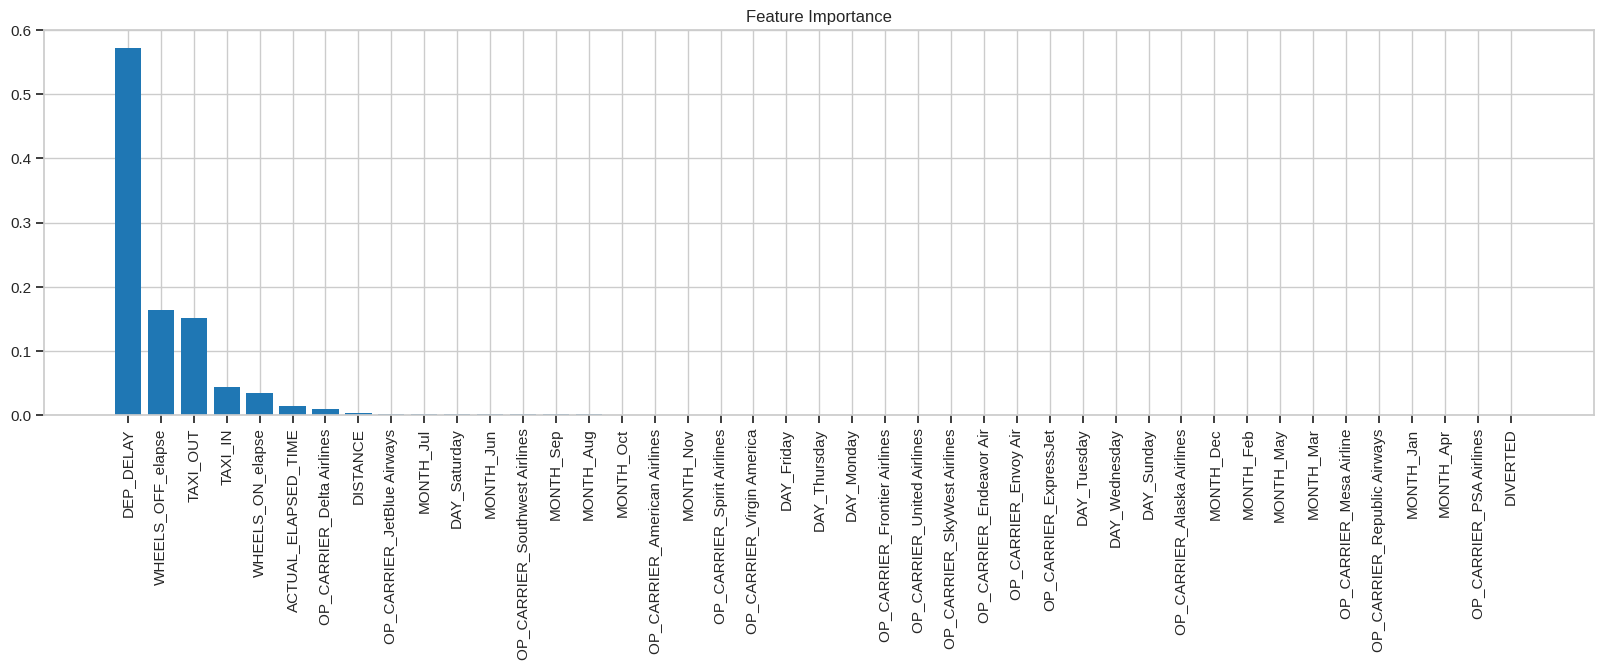

In [177]:
# Sorting in descending order and rearranging feature names to match sorted feature importance
importance = rf.feature_importances_
indices = np.argsort(importance)[::-1] 
names = [X_train.columns[i] for i in indices]

# Bar chart creation
sns.set_context("notebook")
plt.figure(figsize=(20, 5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importance[indices])
plt.xticks(range(X_train.shape[1]), names, rotation = 90)

plt.show()

In [178]:
features=pd.DataFrame(names)
scale = pd.DataFrame(importance[indices])
keep_features = pd.concat([features, scale],axis=1)
keep_features.columns = ['feature', 'importance']
keep_features

,feature,importance
0,DEP_DELAY,5.718091e-01
1,WHEELS_OFF_elapse,1.636357e-01
2,TAXI_OUT,1.515556e-01
3,TAXI_IN,4.281717e-02
4,WHEELS_ON_elapse,3.360535e-02
5,ACTUAL_ELAPSED_TIME,1.332085e-02
6,OP_CARRIER_Delta Airlines,9.408204e-03
7,DISTANCE,3.334023e-03
8,OP_CARRIER_JetBlue Airways,1.794074e-03
9,MONTH_Jul,1.689081e-03


### Classification Modelling

In [179]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score, 
    accuracy_score, 
    confusion_matrix, 
    classification_report
)

#### Base classifiers
- Logistic regression
- SVM
- Decision Tree
- Random Forest

In [180]:
flight_data_new["FLIGHT_STATUS"] = flight_data_new["FLIGHT_STATUS"].astype('category')

In [181]:
flight_data_new.to_csv('flight_data_new.csv',index=False)

In [182]:
X_train, X_test, y_train, y_test = train_test_split(
    flight_data_new.drop(labels=['FLIGHT_STATUS'], axis=1),
    flight_data_new['FLIGHT_STATUS'],
    test_size=0.2,
    random_state=100)

X_train.shape, X_test.shape

((4555802, 43), (1138951, 43))

#### Random Forest

In [187]:
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=4)
    rf.fit(X_train, y_train)

    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Roc-auc Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Random Forest test:', accuracy_score(y_test, rf.predict(X_test)))
    print()
    print('Precision Random Forest test:', precision_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('Recall Random Forest test:', recall_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('F-measure Random Forest test:', f1_score(y_test, rf.predict(X_test),pos_label=1))

In [188]:
run_randomForests(X_train, X_test, y_train, y_test)

Test set
Roc-auc Random Forests roc-auc: 0.957157788594162

Accuracy Random Forest test: 0.876432787714309

Precision Random Forest test: 0.9754491237056822

Recall Random Forest test: 0.3656997585778038

F-measure Random Forest test: 0.5319640701436995


#### Logistic Regression

In [189]:
from sklearn.linear_model import LogisticRegression

In [190]:
def run_logisticReg(X_train, X_test, y_train, y_test):
    lr = LogisticRegression(random_state=100)
    lr.fit(X_train, y_train)

    print('Test set')
    pred = lr.predict_proba(X_test)
    print('Roc-auc Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Logistic Regression:', accuracy_score(y_test, lr.predict(X_test)))
    print()
    print('Precision Logistic Regression:', precision_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('Recall Logistic Regression:', recall_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('F-measure Logistic Regression:', f1_score(y_test, lr.predict(X_test),pos_label=1))

In [191]:
run_logisticReg(X_train, X_test, y_train, y_test)

Test set
Roc-auc Logistic Regression roc-auc: 0.9788938705060929

Accuracy Logistic Regression: 0.9458589526678496

Precision Logistic Regression: 0.8990891902331917

Recall Logistic Regression: 0.8088283707659668

F-measure Logistic Regression: 0.8515737076726072


#### Decision Tree

In [192]:
from sklearn.tree import DecisionTreeClassifier

In [193]:

def run_DT(X_train, X_test, y_train, y_test):
    DT = DecisionTreeClassifier(random_state=100)
    DT = DT.fit(X_train,y_train)

    print('Test set')
    pred = DT.predict_proba(X_test)
    print('Roc-auc Decision Tree roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Decision Tree:', accuracy_score(y_test, DT.predict(X_test)))
    print()
    print('Precision Decision Tree:', precision_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('Recall Decision Tree:', recall_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('F-measure Decision Tree:', f1_score(y_test, DT.predict(X_test),pos_label=1))


In [194]:
run_DT(X_train, X_test, y_train, y_test)

Test set
Roc-auc Decision Tree roc-auc: 0.8940368013741914

Accuracy Decision Tree: 0.9337846843279474

Precision Decision Tree: 0.8263368862166348

Recall Decision Tree: 0.8294955739264028

F-measure Decision Tree: 0.8279132172944752


#### Support Vector Machine (SVM)

In [195]:
from sklearn import svm

In [196]:
def run_SVM(X_train, X_test, y_train, y_test):
    svm_class = svm.SVC(probability=True, random_state=100)
    svm_class.fit(X_train, y_train)

    print('Test set')
    pred = svm_class.predict_proba(X_test)
    print('Roc-auc Random Forests roc-auc: {}'.format(roc_auc_score(y_test, svm_class.pred[:,1])))
    print()
    print('Accuracy Random Forest test:', accuracy_score(y_test, svm_class.predict(X_test)))
    print()
    print('Precision Random Forest test:', precision_score(y_test, svm_class.predict(X_test),pos_label=1))
    print()
    print('Recall Random Forest test:', recall_score(y_test, svm_class.predict(X_test),pos_label=1))
    print()
    print('F-measure Random Forest test:', f1_score(y_test, svm_class.predict(X_test),pos_label=1))

In [ ]:
run_SVM(X_train, X_test, y_train, y_test)